<a href="https://colab.research.google.com/github/CornelioEmbedded/Self-Driving-Car/blob/main/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

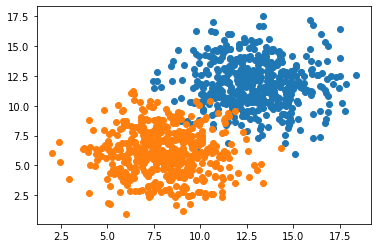

In [43]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [21]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')


Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 0s 2ms/step - loss: 2.0605 - accuracy: 0.5600
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6770
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.7980
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8630
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.9140
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.9180
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.9410
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9410
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9560
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9550
Epoch 11/500
20/20 [=

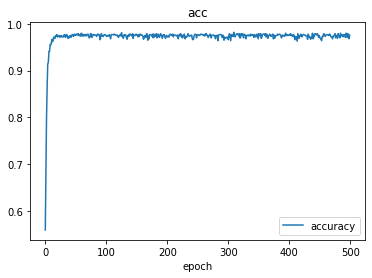

In [23]:
plt.plot(h.history['accuracy'])
plt.title('acc')
plt.xlabel('epoch')
plt.legend(['accuracy'])

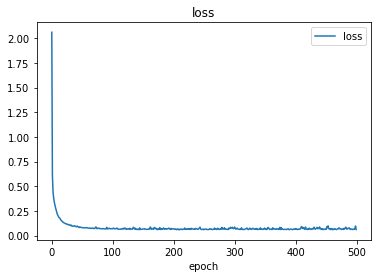

In [24]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [41]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

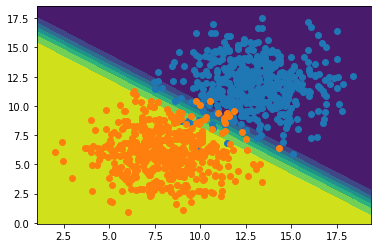

In [44]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction : [[0.9999913]]


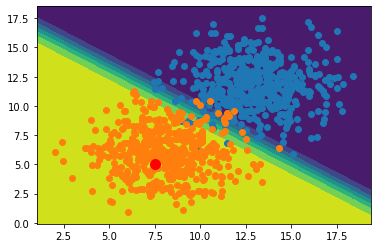

In [47]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5

point = np.array([[x,y]])

prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color = 'red')
print(f'Prediction : {prediction}')